# 911 Calls 

We will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The dataset contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)



## Data and Setup

____
** Importing numpy and pandas **

In [1]:
import pandas as pd
import numpy as np

** Importing visualization libraries and set %matplotlib inline. **

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

** Reading the csv file as a dataframe called df **

In [3]:
df = pd.read_csv('911.csv')

** Checking the info() of the df **

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Checking the head of df **

In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,10-12-15 17:40,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,10-12-15 17:40,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,10-12-15 17:40,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,10-12-15 17:40,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,10-12-15 17:40,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Some Basic Questions Associated with Dataset

** What are the top 5 zipcodes for 911 calls? **

In [13]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [15]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** Take a look at the 'title' column, how many unique title codes are there? **

In [23]:
len(df['title'].unique())

110

In [24]:
df['title'].nunique()

110

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [27]:
a = df['title'].iloc[0]

In [28]:
a.split(':')[0]

'EMS'

In [29]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [30]:
df['Reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
5            EMS
6            EMS
7            EMS
8            EMS
9        Traffic
10       Traffic
11       Traffic
12       Traffic
13       Traffic
14       Traffic
15       Traffic
16           EMS
17           EMS
18           EMS
19       Traffic
20       Traffic
21       Traffic
22          Fire
23       Traffic
24       Traffic
25           EMS
26           EMS
27          Fire
28       Traffic
29       Traffic
          ...   
99462        EMS
99463        EMS
99464        EMS
99465        EMS
99466        EMS
99467        EMS
99468       Fire
99469       Fire
99470        EMS
99471        EMS
99472        EMS
99473        EMS
99474        EMS
99475    Traffic
99476        EMS
99477        EMS
99478    Traffic
99479        EMS
99480        EMS
99481        EMS
99482    Traffic
99483        EMS
99484       Fire
99485    Traffic
99486    Traffic
99487    Traffic
99488    Traffic
99489        E

** What is the most common Reason for a 911 call based off of this new column? **

In [35]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

** Now use seaborn to create a countplot of 911 calls by Reason. **

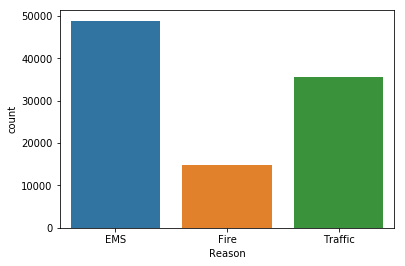

In [36]:
sns.countplot(x='Reason',data=df)

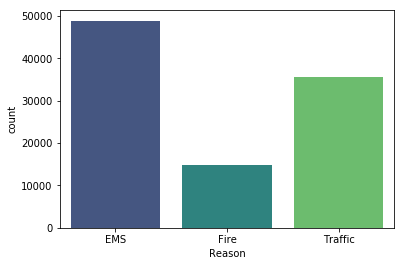

In [40]:
sns.countplot(x='Reason',data=df, palette = 'viridis')

___
** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

In [37]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,10-12-15 17:40,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,10-12-15 17:40,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,10-12-15 17:40,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,10-12-15 17:40,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,10-12-15 17:40,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 10 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
Reason       99492 non-null object
dtypes: float64(3), int64(1), object(6)
memory usage: 7.6+ MB


In [45]:
type(df['timeStamp'])

pandas.core.series.Series

In [46]:
type(df['timeStamp'].iloc)

pandas.core.indexing._iLocIndexer

In [44]:
type(df['timeStamp'].iloc[0])

str

** You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [48]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [49]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

** You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [50]:
time = df['timeStamp'].iloc[0]
time.hour

17

In [51]:
time

Timestamp('2015-10-12 17:40:00')

In [52]:
time.year

2015

In [53]:
time.month

10

In [54]:
time.dayofweek

0

In [56]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)

In [57]:
df['Hour']

0        17
1        17
2        17
3        17
4        17
5        17
6        17
7        17
8        17
9        17
10       17
11       17
12       17
13       17
14       17
15       17
16       17
17       17
18       17
19       17
20       17
21       17
22       18
23       18
24       18
25       18
26       18
27       18
28       18
29       18
         ..
99462     9
99463     9
99464     9
99465     9
99466    10
99467    10
99468    10
99469    10
99470    10
99471    10
99472    10
99473    10
99474    10
99475    10
99476    10
99477    10
99478    10
99479    10
99480    10
99481    10
99482    10
99483    10
99484    10
99485    10
99486    11
99487    11
99488    11
99489    11
99490    11
99491    11
Name: Hour, Length: 99492, dtype: int64

In [58]:
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [59]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-10-12 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,10,0
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-10-12 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,10,0
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-10-12 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,10,0
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-10-12 17:40:00,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,10,0
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-10-12 17:40:00,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,10,0


** Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [60]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [61]:
df['Day of Week'] = df['Day of Week'].map(dmap)

** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

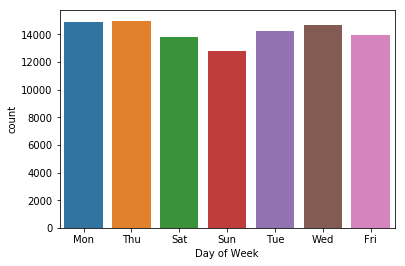

In [70]:
sns.countplot(x='Day of Week', data=df)

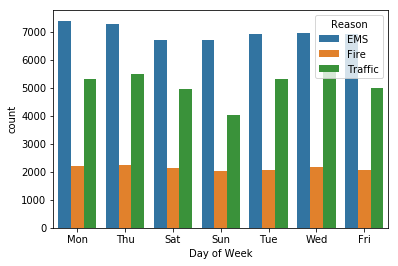

In [72]:
sns.countplot(x='Day of Week', data=df, hue= 'Reason')

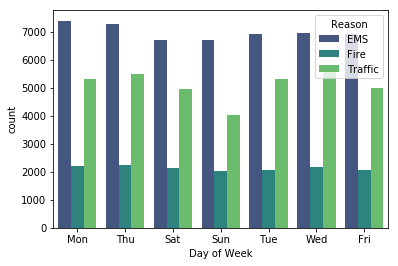

In [73]:
sns.countplot(x='Day of Week', data=df, hue= 'Reason', palette= 'viridis')

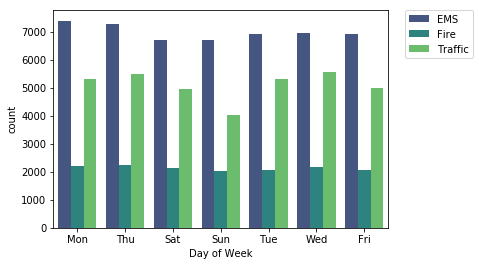

In [74]:
# to keep legend outside of graph

sns.countplot(x='Day of Week', data=df, hue= 'Reason', palette= 'viridis')
plt.legend(bbox_to_anchor = (1.05, 1), loc=2, borderaxespad=0)

**Now do the same for Month:**

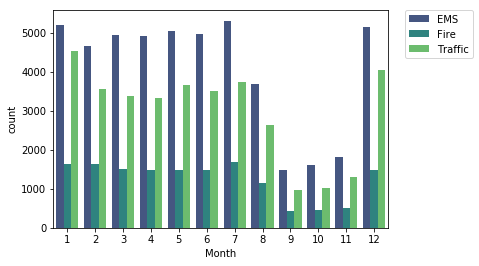

In [77]:
# to keep legend outside of graph

sns.countplot(x='Month', data=df, hue= 'Reason', palette= 'viridis')
plt.legend(bbox_to_anchor = (1.05, 1), loc=2, borderaxespad=0)

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [78]:
byMonth = df.groupby('Month').count()

In [79]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,11355,11355,11355,9893,11355,11355,11351,11257,11355,11355,11355,11355
2,9881,9881,9881,8559,9881,9881,9876,9827,9881,9881,9881,9881
3,9865,9865,9865,8678,9865,9865,9859,9834,9865,9865,9865,9865
4,9725,9725,9725,8523,9725,9725,9722,9689,9725,9725,9725,9725
5,10191,10191,10191,8856,10191,10191,10187,10136,10191,10191,10191,10191


** Now create a simple plot off of the dataframe indicating the count of calls per month. **

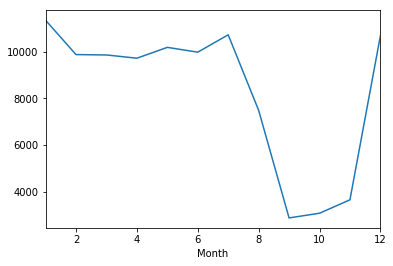

In [80]:
byMonth['lat'].plot()

No handles with labels found to put in legend.


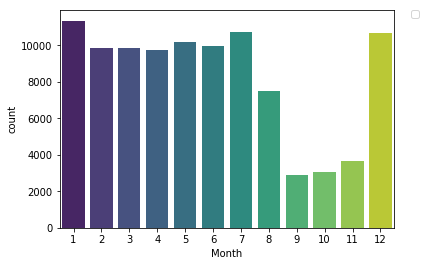

In [81]:
sns.countplot(x='Month', data=df,  palette= 'viridis')
plt.legend(bbox_to_anchor = (1.05, 1), loc=2, borderaxespad=0)

** Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. **

In [82]:
byMonth.reset_index()

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
0,1,11355,11355,11355,9893,11355,11355,11351,11257,11355,11355,11355,11355
1,2,9881,9881,9881,8559,9881,9881,9876,9827,9881,9881,9881,9881
2,3,9865,9865,9865,8678,9865,9865,9859,9834,9865,9865,9865,9865
3,4,9725,9725,9725,8523,9725,9725,9722,9689,9725,9725,9725,9725
4,5,10191,10191,10191,8856,10191,10191,10187,10136,10191,10191,10191,10191
5,6,9985,9985,9985,8678,9985,9985,9980,9938,9985,9985,9985,9985
6,7,10729,10729,10729,9368,10729,10729,10727,10692,10729,10729,10729,10729
7,8,7490,7490,7490,6473,7490,7490,7487,7444,7490,7490,7490,7490
8,9,2870,2870,2870,2523,2870,2870,2869,2851,2870,2870,2870,2870
9,10,3071,3071,3071,2699,3071,3071,3070,3052,3071,3071,3071,3071


C:\Users\shubham\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


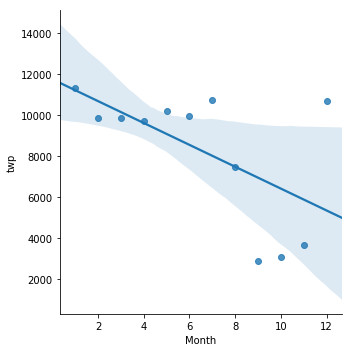

In [83]:
sns.lmplot(x='Month', y='twp', data=byMonth.reset_index())

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

In [84]:
t = df['timeStamp'].iloc[0]

In [85]:
t

Timestamp('2015-10-12 17:40:00')

In [86]:
t.date()

datetime.date(2015, 10, 12)

In [88]:
df['Date'] = df['timeStamp'].apply(lambda t: t.date())

In [89]:
df['Date'].head()

0    2015-10-12
1    2015-10-12
2    2015-10-12
3    2015-10-12
4    2015-10-12
Name: Date, dtype: object

** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

In [92]:
df.groupby('Date').count().head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
Date,,,,,,,,,,,,,
2015-10-12,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-11-12,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447


In [93]:
df.groupby('Date').count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
Date,,,,,,,,,,,,,
2015-10-12,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-11-12,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447
2015-12-15,421,421,421,380,421,421,420,419,421,421,421,421,421
2015-12-16,377,377,377,343,377,377,377,376,377,377,377,377,377
2015-12-17,388,388,388,336,388,388,388,387,388,388,388,388,388
2015-12-18,346,346,346,306,346,346,346,346,346,346,346,346,346


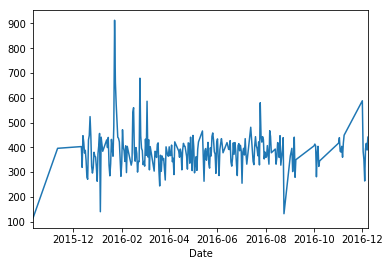

In [95]:
df.groupby('Date').count()['lat'].plot()

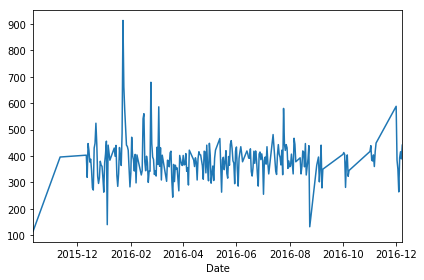

In [96]:
df.groupby('Date').count()['lat'].plot()
plt.tight_layout()

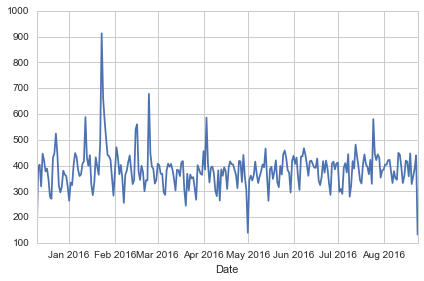

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

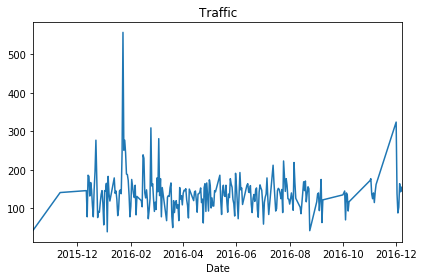

In [98]:
df[df['Reason']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

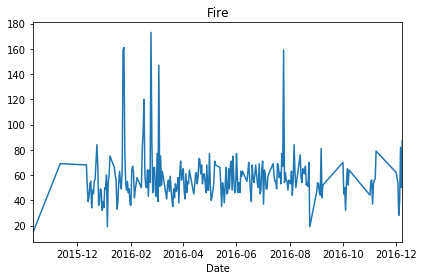

In [99]:
df[df['Reason']=='Fire'].groupby('Date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()

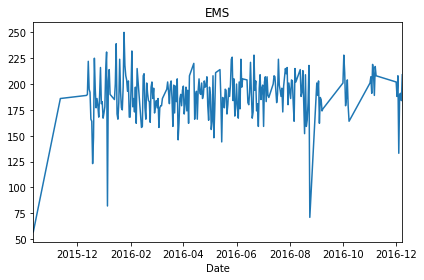

In [100]:
df[df['Reason']=='EMS'].groupby('Date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout()

____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [101]:
df.groupby(by=['Day of Week','Hour']).count()

lat  lng  desc  zip  title  timeStamp  twp  addr    e  \
Day of Week Hour                                                          
Fri         0     283  283   283  245    283        283  283   283  283   
            1     220  220   220  193    220        220  218   217  220   
            2     211  211   211  183    211        211  211   211  211   
            3     184  184   184  170    184        184  184   183  184   
            4     214  214   214  181    214        214  214   214  214   
            5     207  207   207  184    207        207  207   207  207   
            6     379  379   379  310    379        379  379   377  379   
            7     551  551   551  483    551        551  551   549  551   
            8     751  751   751  660    751        751  751   748  751   
            9     699  699   699  625    699        699  699   695  699   
            10    772  772   772  702    772        772  772   769  772   
            11    799  799   799  698    799        799  799   799  799   
            12    810  810   810  718    810        810  808   803  810   
            13    858  858   858  733    858        858  858   852  858   
            14    880  880   880  783    880        880  880   875  880   
            15    862  862   862  740    862        862  862   862  862   
            16    944  944   944  810    944        944  944   942  944   
            17    947  947   947  784    947        947  947   940  947   
            18    785  785   785  679    785        785  784   783  785   
            19    659  659   659  578    659        659  659   655  659   
            20    593  593   593  515    593        593  593   592  593   
            21    489  489   489  435    489        489  489   485  489   
            22    477  477   477  411    477        477  477   476  477   
            23    419  419   419  352    419        419  419   419  419   
Mon         0     279  279   279  248    279        279  279   279  279   
            1     228  228   228  202    228        228  227   228  228   
            2     215  215   215  195    215        215  215   215  215   
            3     191  191   191  172    191        191  191   191  191   
            4     205  205   205  183    205        205  205   204  205   
            5     265  265   265  223    265        265  265   265  265   
...               ...  ...   ...  ...    ...        ...  ...   ...  ...   
Tue         18    819  819   819  710    819        819  819   818  819   
            19    680  680   680  621    680        680  680   679  680   
            20    534  534   534  478    534        534  534   533  534   
            21    463  463   463  407    463        463  462   458  463   
            22    421  421   421  368    421        421  421   421  421   
            23    293  293   293  247    293        293  293   292  293   
Wed         0     263  263   263  238    263        263  262   263  263   
            1     233  233   233  207    233        233  233   233  233   
            2     206  206   206  178    206        206  206   204  206   
            3     218  218   218  199    218        218  216   218  218   
            4     165  165   165  145    165        165  165   164  165   
            5     246  246   246  213    246        246  246   246  246   
            6     390  390   390  326    390        390  389   389  390   
            7     605  605   605  518    605        605  605   595  605   
            8     886  886   886  781    886        886  886   884  886   
            9     872  872   872  768    872        872  871   868  872   
            10    799  799   799  711    799        799  799   798  799   
            11    771  771   771  688    771        771  771   767  771   
            12    831  831   831  744    831        831  830   827  831   
            13    849  849   849  755    849        849  849   847  849   
            14    869  869   869  758    86

In [102]:
df.groupby(by=['Day of Week','Hour']).count()['Reason']

Day of Week  Hour
Fri          0       283
             1       220
             2       211
             3       184
             4       214
             5       207
             6       379
             7       551
             8       751
             9       699
             10      772
             11      799
             12      810
             13      858
             14      880
             15      862
             16      944
             17      947
             18      785
             19      659
             20      593
             21      489
             22      477
             23      419
Mon          0       279
             1       228
             2       215
             3       191
             4       205
             5       265
                    ... 
Tue          18      819
             19      680
             20      534
             21      463
             22      421
             23      293
Wed          0       263
             1       233
       

In [103]:
df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,283,220,211,184,214,207,379,551,751,699,...,880,862,944,947,785,659,593,489,477,419
Mon,279,228,215,191,205,265,377,637,766,793,...,859,952,1014,1031,898,818,670,536,492,328
Sat,355,266,221,244,229,249,305,482,584,683,...,812,824,874,875,823,712,619,551,492,396
Sun,353,296,274,227,199,221,335,527,517,665,...,774,756,764,766,715,628,561,524,445,359
Thu,296,231,233,183,188,204,360,564,771,795,...,893,975,954,985,848,737,716,648,470,411
Tue,283,247,189,188,218,237,367,604,769,807,...,910,885,973,927,819,680,534,463,421,293
Wed,263,233,206,218,165,246,390,605,886,872,...,869,900,967,986,874,674,684,577,486,353


In [104]:
dayhour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()

** Now create a HeatMap using this new DataFrame. **

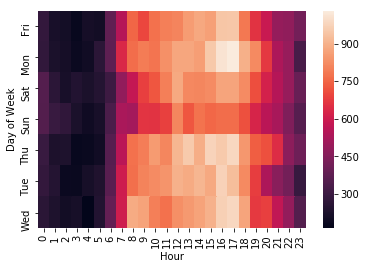

In [105]:
sns.heatmap(dayhour)

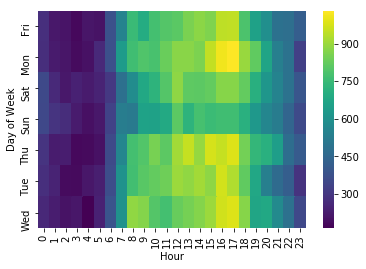

In [106]:
sns.heatmap(dayhour,cmap='viridis')

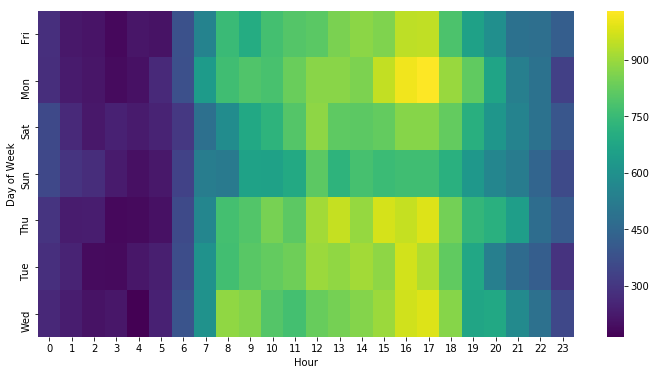

In [107]:
plt.figure(figsize=(12,6))
sns.heatmap(dayhour,cmap='viridis')

** Now create a clustermap using this DataFrame. **

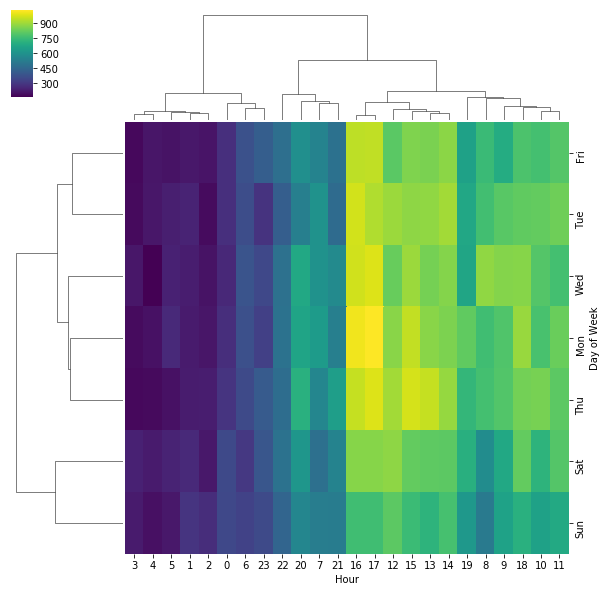

In [109]:
sns.clustermap(dayhour,cmap='viridis')

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [110]:
month = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()

In [111]:
month.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Fri,1995,1138,1359,1956,1622,1100,1907,779,380,323,381,1053
Mon,1364,1966,1463,1217,1481,1617,1381,1486,357,521,417,1650
Sat,1965,1497,980,1412,1467,1063,1373,1188,396,751,404,1328
Sun,1637,1272,1247,989,1822,1025,1421,1133,302,413,360,1171
Thu,1610,1177,1494,1495,1197,1568,1646,729,715,404,780,2180


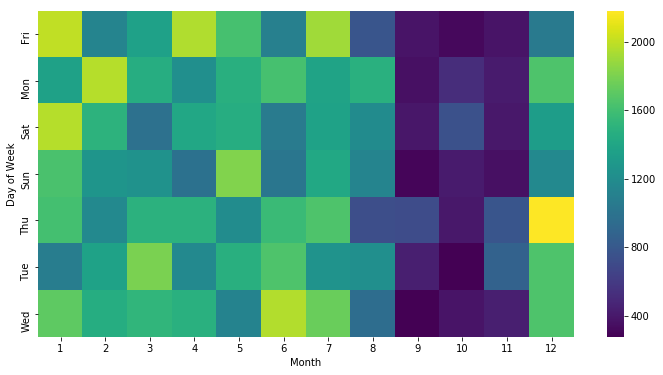

In [112]:
plt.figure(figsize=(12,6))
sns.heatmap(month,cmap='viridis')

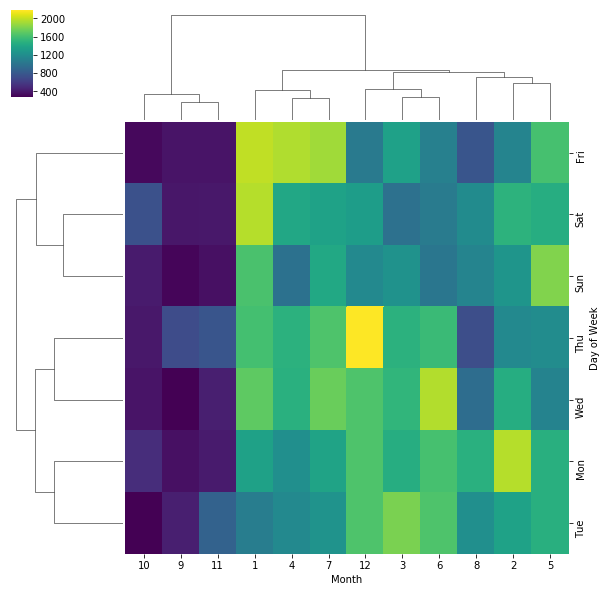

In [113]:
sns.clustermap(month,cmap='viridis')